In [3]:
import pandas as pd
import numpy as np
import requests
import json
import urllib
from corenlp_xml.document import Document
import string

path="corenlp_plot_summaries/"
with open(path+'330.xml', 'r') as file:
    # print((''.join(file.readlines()[2:])))
    print(file.readlines()[0][0])
    doc=''.join(file.readlines()[0:])
    doc
    d = Document(doc)
    # sentences = d.sentences
    
    # word_to_pos = dict([(token.word, token.pos) for token in sentences[0].tokens])
    # word_to_pos

# get xml file and parse it

# test=pd.read(path+"330.xml")
# test

<


XMLSyntaxError: Document is empty, line 1, column 1 (<string>, line 1)

In [4]:
import urllib.error
from urllib.error import HTTPError
page='The_Godfather'

def get_views(name) :
    url=f'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/{page}/monthly/20211001/20221030'
    try:
        resp = urllib.request.urlopen(url) 
        resp_bytes = resp.read()
        data = json.loads(resp_bytes)
        sum=0
        for month in data['items'] :
            sum+=month['views']
            # print(month['views'])

        return sum/12

    except:
        return 0
    # except urllib.error.HTTPError as err:
    #     print(err.code)
    
    
(get_views(page))

347649.25

In [ ]:
page="Buttermilk_and_Cigarettes"
url=f'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/{page}/monthly/20211001/20221030'
get_views(page)

0

In [18]:
import random
np.random.seed(2)
movie_names=data['name']

mini_set=movie_names.sample(10)
mini_set


64745                                         Musafir
28151      Confessionsofa Ex-Doofus-ItchyFooted Mutha
25234                                   Heaven's Rain
60778                                The Killing Kind
26441                                    Runaway Jury
62960                                             Boy
39600                                 Follow the Boys
33951                       Sunset Carson Rides Again
76567    Band and Battalion of the U.S. Indian School
46312                       Buttermilk and Cigarettes
Name: name, dtype: object

In [ ]:
# wikipediapageviews
# for i in movie_names :
#     page=i.replace(' ','_')
#     print(page)
#     print(get_views(page))


Ghosts_of_Mars
17161.416666666668
Getting_Away_with_Murder:_The_JonBenét_Ramsey_Mystery
0
Brun_bitter
65.83333333333333
White_Of_The_Eye
0
A_Woman_in_Flames
424.3333333333333
The_Gangsters
122.83333333333333
The_Sorcerer's_Apprentice
7310.25
Alexander's_Ragtime_Band
2831.25
Contigo_y_aquí
0
City_of_the_Dead
74.5
Sarah_and_Son
309.4166666666667
Lady_Snowblood_2:_Love_Song_of_Vengeance
121.41666666666667
Little_city
13.333333333333334
Henry_V
2337.1666666666665
Aaah_Belinda
30.75
The_Mechanical_Monsters
1143.0833333333333
1919
7317.25
Mary_Poppins
3080.75
Die_Fahne_von_Kriwoj_Rog
19.416666666666668
Keep_the_Change
59.0
The_Devil's_Holiday
421.8333333333333
New_Rose_Hotel
1083.1666666666667
White_on_Rice
750.9166666666666
Freddy_and_the_Song_of_the_South_Pacific
242.83333333333334
Road_to_Life
23.25
Camera_Thrills
104.41666666666667
Ferdinando_I,_re_di_Napoli
221.58333333333334
Anbu_Thozhi
0
Middle_Age_Spread
107.5
Baby_Boy
1028.3333333333333
Bindiya_Chamkegi
512.0833333333334
Vandanam
33

In [ ]:
from lxml import etree
from io import StringIO, BytesIO


In [ ]:
file=open(path+'330.xml','r')
parser = etree.XMLParser(encoding='UTF-8')
tree= etree.parse(file,parser)
root=tree.getroot()
# print(etree.tostring(root, pretty_print=True))
for  child in root[0]:
    print(child.tag)
    for child1 in child:
        print(etree.tostring(child1))

IndentationError: expected an indented block (1218196450.py, line 9)

In [84]:
# sort by country
import json
movies_header = ['wikipedia_id', 'freebase_id', 'name', 'release_date', 'box_office_revenue', 'runtime', 'languages', 'countries', 'genres']
movies = pd.read_csv('data/movie.metadata.tsv', sep='\t', header=None, names=movies_header)
data = pd.read_csv('data/movie.metadata.tsv', sep='\t', header=None, names=movies_header)
movies.head(5)
print(movies.shape)
# movies=movies['countries'].apply(lambda row: len((eval(row).values())))
movies=movies['countries'].apply(lambda row: (eval(row).values()))
movies= pd.DataFrame(movies,columns=['countries'])
# movies['countries'].apply(len)
# movies.describe()
movies.head()



(81741, 9)


countries
0  (United States of America)
1  (United States of America)
2                    (Norway)
3            (United Kingdom)
4                   (Germany)

In [85]:

movies=movies['countries'].apply(lambda row: (eval(row).values()))
movies= pd.DataFrame(movies,columns=['countries'])
exploded=pd.DataFrame([[c] for C in movies['countries'] for c in C],columns=['countries'])
len(exploded['countries'].unique())
count=exploded['countries'].value_counts()
count.to_csv('test.csv')

TypeError: eval() arg 1 must be a string, bytes or code object

In [9]:
# US=movies['countries'].apply(lambda lis : "United States of America" in lis and len(lis)==1)
US=movies['countries'].apply(lambda lis : "United States of America" in lis)
US_movies=data.loc[US]
print(US.sum())
IN=movies['countries'].apply(lambda lis : "India" in lis)
IN_movies=movies[IN]
print(IN.sum())

mult=movies['countries'].apply(lambda lis : len(lis)>1)
sum(mult)

# one list with all the countries of all the movies
exploded=pd.DataFrame([[c] for C in movies['countries'] for c in C],columns=['countries'])
len(exploded['countries'].unique())
count=exploded['countries'].value_counts()
count.to_csv('test.csv')
US_movies
# tries=count.index.to_series(index=None, name=None)

# for i in range(147):
#     print(tries.iloc[i],count.iloc[i])

# import sys
# original_stdout = sys.stdout # Save a reference to the original standard output

# with open('filename.txt', 'w') as f:
#     sys.stdout = f # Change the standard output to the file we created.
#     print(exploded['countries'].value_counts())
#     sys.stdout = original_stdout # Reset the standard output to its original value
# other_movies=data[not(US.bool)]


34408
8411


wikipedia_id freebase_id  \
0            975900   /m/03vyhn   
1           3196793   /m/08yl5d   
5          13696889  /m/03cfc81   
7          10408933  /m/02qc0j7   
10           175026   /m/017n1p   
...             ...         ...   
81725       1918494   /m/0660qx   
81726        664006   /m/030xw6   
81727      24209227  /m/07k5mlk   
81736      35228177  /m/0j7hxnt   
81738       9971909  /m/02pygw1   

                                                    name release_date  \
0                                         Ghosts of Mars   2001-08-24   
1      Getting Away with Murder: The JonBenét Ramsey ...   2000-02-16   
5                                          The Gangsters   1913-05-29   
7                               Alexander's Ragtime Band   1938-08-16   
10                                         Sarah and Son         1930   
...                                                  ...          ...   
81725                                     State and Main   2000-08-26   
81726                                      Guilty as Sin   1993-06-04   
81727                   The Time, the Place and the Girl         1946   
81736                           Mermaids: The Body Found   2011-03-19   
81738                                  Another Nice Mess   1972-09-22   

       box_office_revenue  runtime  \
0              14010832.0     98.0   
1                     NaN     95.0   
5                     NaN     35.0   
7               3600000.0    106.0   
10                    NaN     86.0   
...                   ...      ...   
81725           6944471.0    106.0   
81726          22886222.0    107.0   
81727                 NaN    105.0   
81736                 NaN    120.0   
81738                 NaN     66.0   

                                               languages  \
0                     {"/m/02h40lc": "English Language"}   
1                     {"/m/02h40lc": "English Language"}   
5      {"/m/06ppq": "Silent film", "/m/02h40lc": "Eng...   
7                     {"/m/02h40lc": "English Language"}   
10                    {"/m/02h40lc": "English Language"}   
...                                                  ...   
81725  {"/m/02bjrlw": "Italian Language", "/m/02h40lc...   
81726                                                 {}   
81727                 {"/m/02h40lc": "English Language"}   
81736                 {"/m/02h40lc": "English Language"}   
81738                 {"/m/02h40lc": "English Language"}   

                                               countries  \
0              {"/m/09c7w0": "United States of America"}   
1              {"/m/09c7w0": "United States of America"}   
5              {"/m/09c7w0": "United States of America"}   
7              {"/m/09c7w0": "United States of America"}   
10             {"/m/09c7w0": "United States of America"}   
...                                                  ...   
81725  {"/m/0f8l9c": "France", "/m/09c7w0": "United S...   
81726          {"/m/09c7w0": "United States of America"}   
81727          {"/m/09c7w0": "United States of America"}   
81736          {"/m/09c7w0": "United States of America"}   
81738          {"/m/09c7w0": "United States of America"}   

                                                  genres  
0      {"/m/01jfsb": "Thriller", "/m/06n90": "Science...  
1      {"/m/02n4kr": "Mystery", "/m/03bxz7": "Biograp...  
5      {"/m/02hmvc": "Short Film", "/m/06ppq": "Silen...  
7      {"/m/04t36": "Musical", "/m/01z4y": "Comedy", ...  
10     {"/m/07s9rl0": "Drama", "/m/01g6gs": "Black-an...  
...                                                  ...  
81725  {"/m/0gf28": "Parody", "/m/09n5t_": "Americana...  
81726  {"/m/01jfsb": "Thriller", "/m/0glj9q": "Erotic...  
81727  {"/m/05p553": "Comedy film", "/m/02l7c8": "Rom...  
81736                            {"/m/07s9rl0": "Drama"}  
81738       {"/m/06nbt": "Satire", "/m/01z4y": "Comedy"}  

[34408 rows x 9 columns]

True

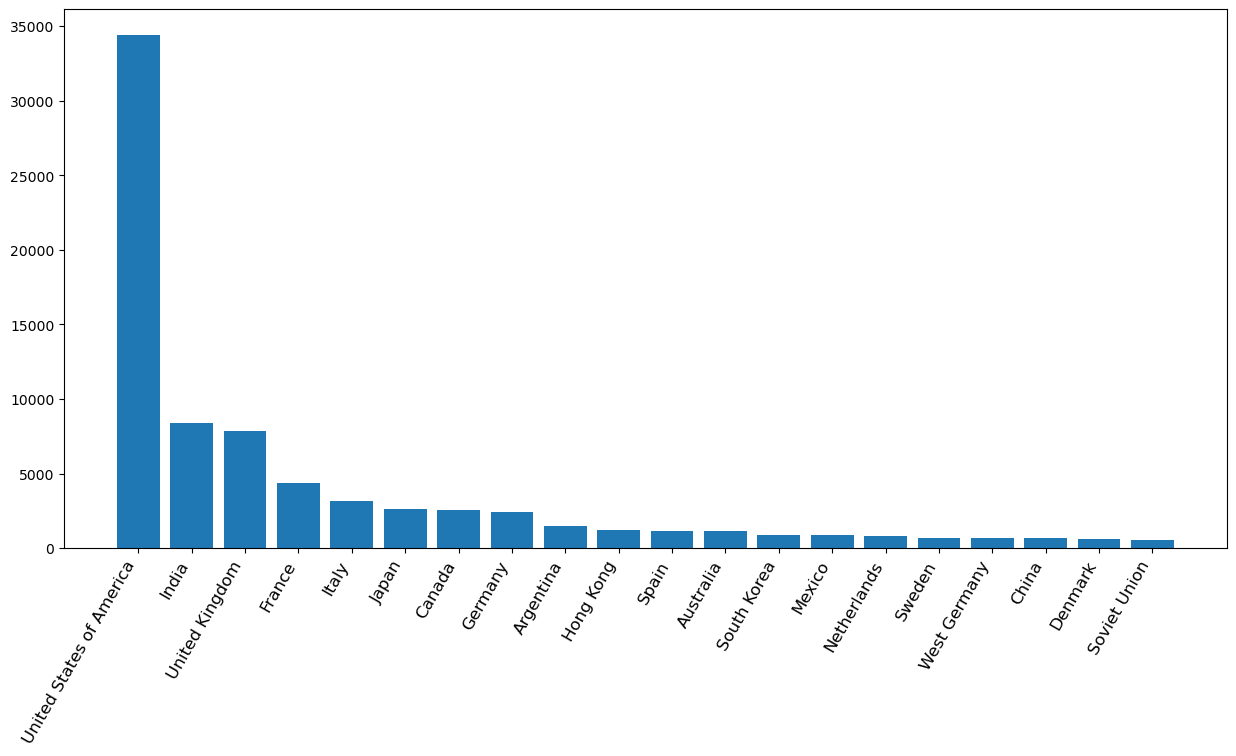

In [71]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(count.head(20).index.to_series(),count.head(20))
plt.xticks(rotation=60, horizontalalignment='right', fontsize=12);

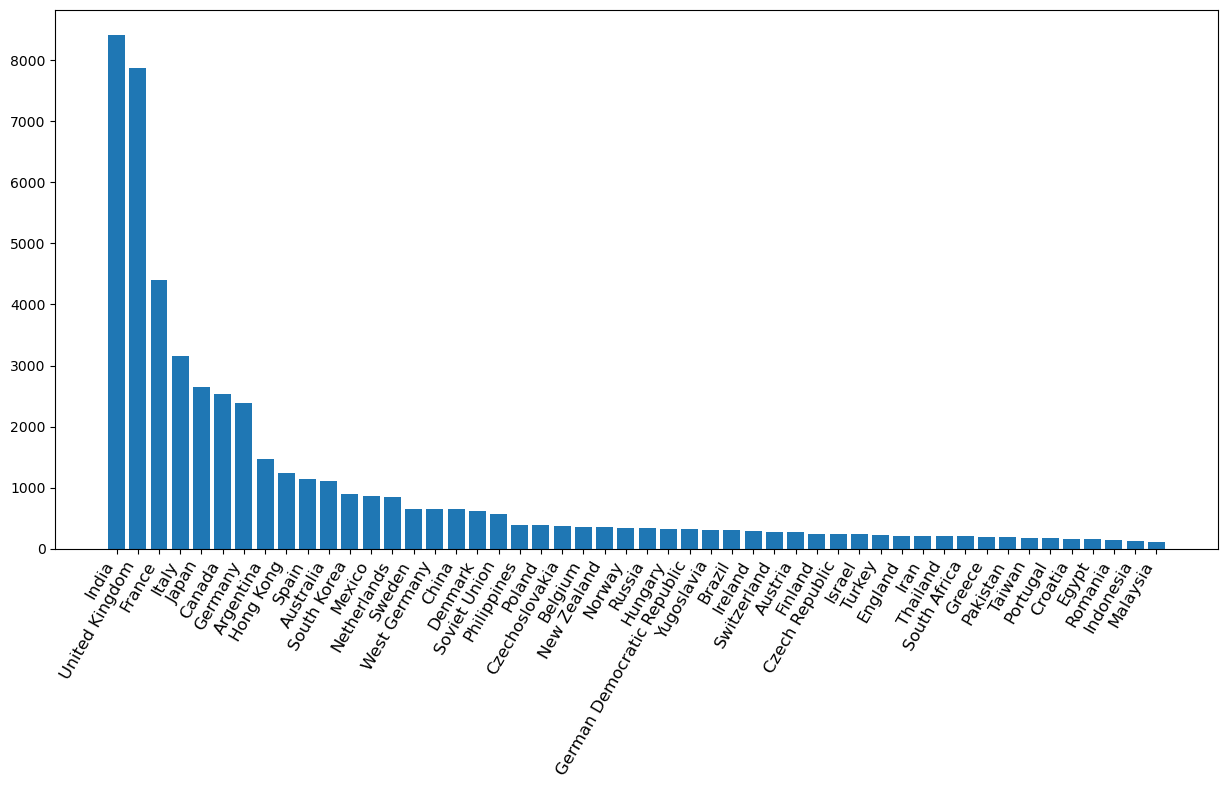

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(count[1:51].index.to_series(),count[1:51])
plt.xticks(rotation=60, horizontalalignment='right', fontsize=12);

Whats left:
movie success and earnings by country
pageviews: english wikipedia :/
evolution in time of movie distribution: us india uk europe russia and former soviet union asia 


In [26]:
# sort movies by date 
data[(data['release_date']<'2000') & (data['release_date']>='1995')]

wikipedia_id freebase_id                             name release_date  \
12          6631279   /m/0gffwj                      Little city   1997-04-04   
21           612710   /m/02wjqm                   New Rose Hotel   1999-10-01   
38         26067101  /m/0b6c_nw                      Siam Sunset         1999   
46          2487170   /m/07h9zj                           Troops         1997   
57         11633165  /m/02rm6l8                        Innocence         1997   
...             ...         ...                              ...          ...   
81648      11823946  /m/02rtqvb  Twelfth Night: Or What You Will   1996-10-25   
81657        303933   /m/01s7w3                          Twister   1996-05-10   
81678      30553937  /m/0g9ts5h      Confessions of a Sexist Pig   1998-03-07   
81694       1191380   /m/04f_y7                            Wilde         1997   
81696      35056182  /m/0j62hf9         Bug Bites: An Ant's Life         1998   

       box_office_revenue  runtime                           languages  \
12                    NaN     93.0  {"/m/02h40lc": "English Language"}   
21                21521.0     92.0  {"/m/02h40lc": "English Language"}   
38                    NaN     91.0                                  {}   
46                    NaN     10.0  {"/m/02h40lc": "English Language"}   
57                    NaN    110.0  {"/m/02hwyss": "Turkish Language"}   
...                   ...      ...                                 ...   
81648            588621.0    134.0  {"/m/02h40lc": "English Language"}   
81657         494471524.0    113.0  {"/m/02h40lc": "English Language"}   
81678                 NaN     91.0  {"/m/02h40lc": "English Language"}   
81694           2158775.0    118.0  {"/m/02h40lc": "English Language"}   
81696                 NaN      NaN  {"/m/02h40lc": "English Language"}   

                                               countries  \
12             {"/m/09c7w0": "United States of America"}   
21             {"/m/09c7w0": "United States of America"}   
38     {"/m/0chghy": "Australia", "/m/0ctw_b": "New Z...   
46             {"/m/09c7w0": "United States of America"}   
57                               {"/m/01znc_": "Turkey"}   
...                                                  ...   
81648  {"/m/09c7w0": "United States of America", "/m/...   
81657          {"/m/09c7w0": "United States of America"}   
81678          {"/m/09c7w0": "United States of America"}   
81694  {"/m/014tss": "Kingdom of Great Britain", "/m/...   
81696          {"/m/09c7w0": "United States of America"}   

                                                  genres  
12     {"/m/06cvj": "Romantic comedy", "/m/0hj3n0w": ...  
21     {"/m/01jfsb": "Thriller", "/m/06n90": "Science...  
38     {"/m/06cvj": "Romantic comedy", "/m/02l7c8": "...  
46     {"/m/068twy": "Fan film", "/m/02hmvc": "Short ...  
57     {"/m/0lsxr": "Crime Fiction", "/m/07s9rl0": "D...  
...                                                  ...  
81648  {"/m/06cvj": "Romantic comedy", "/m/02l7c8": "...  
81657  {"/m/03btsm8": "Action/Adventure", "/m/01drsx"...  
81678  {"/m/06cvj": "Romantic comedy", "/m/01z4y": "C...  
81694  {"/m/0hn10": "LGBT", "/m/017fp": "Biography", ...  
81696  {"/m/0hqxf": "Family Film", "/m/0hcr": "Animat...  

[5179 rows x 9 columns]

In [73]:
set1=data[data['release_date']<'1985']
set2=data[data['release_date']>'1985']
set1=set1['countries']
set2=set2['countries']
def analysis(set) :
    set=set.apply(lambda row: (eval(row).values()))
    set= pd.DataFrame(set,columns=['countries'])
    exploded=pd.DataFrame([[c] for C in set['countries'] for c in C],columns=['countries'])
    # len(exploded['countries'].unique())
    count=exploded['countries'].value_counts()
    count.to_csv('test.csv')
    return count

c1=analysis(set1)
c2=analysis(set2)

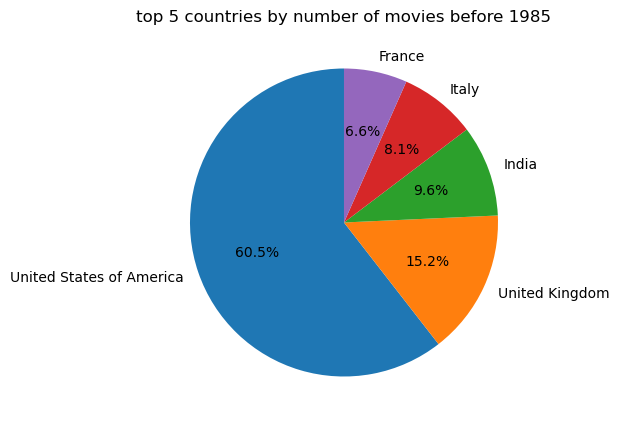

United States of America    United States of America
United Kingdom                        United Kingdom
India                                          India
Italy                                          Italy
France                                        France
dtype: object

In [81]:
fig, ax = plt.subplots(figsize=(11,5))
# fig.set_facecolor('white')
# fig.set_size_inches(11, 5)
# fig.suptitle('title')
plot_counts=c1.head(5)
plot_countries=plot_counts.index.to_series()
ax.pie(plot_counts, labels=plot_countries, startangle=90,autopct='%1.1f%%', radius=1)
ax.set_title('top 5 countries by number of movies before 1985')
plt.show()
# plot_countries


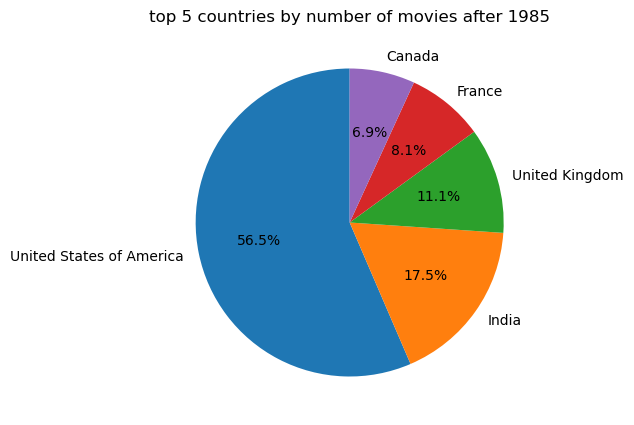

In [83]:
fig, ax = plt.subplots(figsize=(11,5))
# fig.set_facecolor('white')
# fig.set_size_inches(11, 5)
# fig.suptitle('title')
plot_counts=c2.head(5)
plot_countries=plot_counts.index.to_series()
ax.pie(plot_counts, labels=plot_countries, startangle=90,autopct='%1.1f%%', radius=1)
ax.set_title('top 5 countries by number of movies after 1985')
plt.show()